___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x:"%.3f" % x)

pd.set_option("display.max_column", None)

In [1]:

import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [13]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [6]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

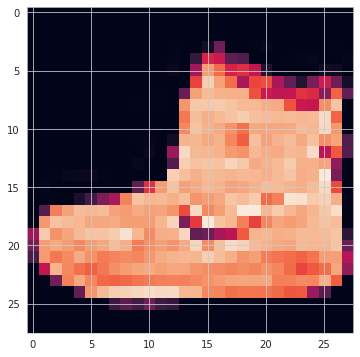

In [11]:
plt.imshow(X_train[0])

In [12]:
y_train[0]

9

In [14]:
X_train[5].shape

(28, 28)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [15]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [17]:
classes[y_train[0]]

'Ankle boot'

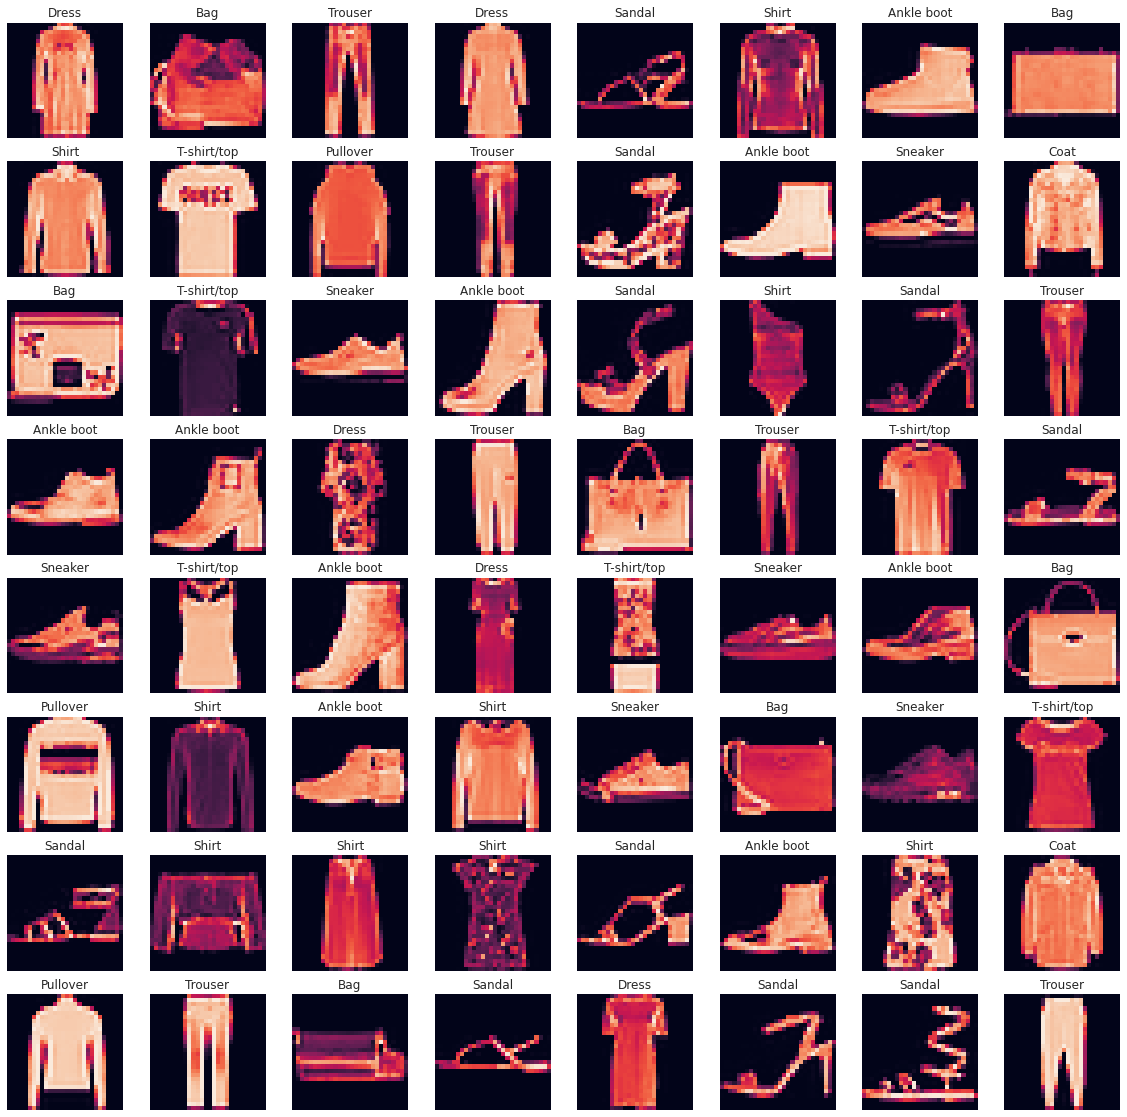

In [18]:
plt.figure(figsize=(20,20))
for i in range(64):
  rand_index = int(np.random.randint(low=0, high=60000, size=1)) 
  plt.subplot(8,8,i+1)
  plt.axis("off")
  plt.title(classes[int(y_train[rand_index])])
  plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [19]:
X_train[0].min()

0

In [20]:
X_train[0].max()

255

In [23]:
# Normalize image pixels

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255
X_test /= 255

In [24]:
X_train[0].min()

0.0

In [25]:
X_train[0].max()

1.0

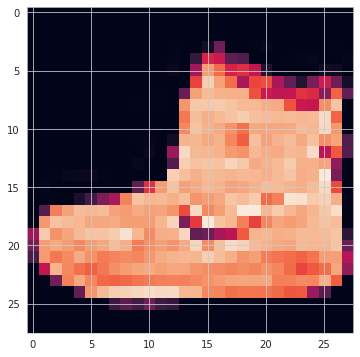

In [31]:
plt.imshow(X_train[0])

In [27]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [30]:
pd.DataFrame(y_train).value_counts()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [26]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [32]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [33]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [34]:
from tensorflow.keras.utils import to_categorical

In [35]:
# gözlem hangi kategoride ise o indexteki değeri 1 diğerlerini 0 yapar.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [37]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [46]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28,28,1), activation="relu"))
model.add(MaxPool2D(pool_size = (2, 2), strides = (1,1)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [47]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 28)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 17500)             0         
                                                                 
 dense_5 (Dense)             (None, 128)               2240128   
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
____________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
earlystop = EarlyStopping(monitor="val_accuracy", mode="max", patience=2, restore_best_weights=True)

In [50]:
model.fit(X_train, y_train, 
          batch_size=64, 
          epochs=10, 
          validation_data=[X_test, y_test],
          callbacks=[earlystop])

Epoch 1/10
938/938 [==============================] - 13s 5ms/step - loss: 0.4051 - accuracy: 0.8601 - val_loss: 0.3289 - val_accuracy: 0.8815
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2530 - accuracy: 0.9089 - val_loss: 0.2642 - val_accuracy: 0.9058
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2066 - accuracy: 0.9255 - val_loss: 0.2592 - val_accuracy: 0.9113
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1732 - accuracy: 0.9366 - val_loss: 0.2644 - val_accuracy: 0.9132
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1507 - accuracy: 0.9462 - val_loss: 0.2765 - val_accuracy: 0.9150
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1301 - accuracy: 0.9539 - val_loss: 0.3052 - val_accuracy: 0.9071
Epoch 7/10
938/938 [==============================] - 4s 5ms/step - loss: 0.1116 - accuracy: 0.9594 - val_loss: 0.3102 - val_accuracy: 0.9104


**TASK 7: Plot values of metrics you used in your model.**

In [52]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.405,0.860,0.329,0.882
1,0.253,0.909,0.264,0.906
2,0.207,0.926,0.259,0.911
3,0.173,0.937,0.264,0.913
4,0.151,0.946,0.277,0.915
5,0.130,0.954,0.305,0.907
6,0.112,0.959,0.310,0.910


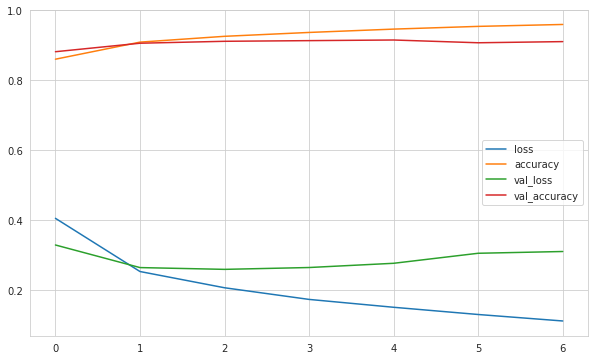

In [53]:
summary.plot()

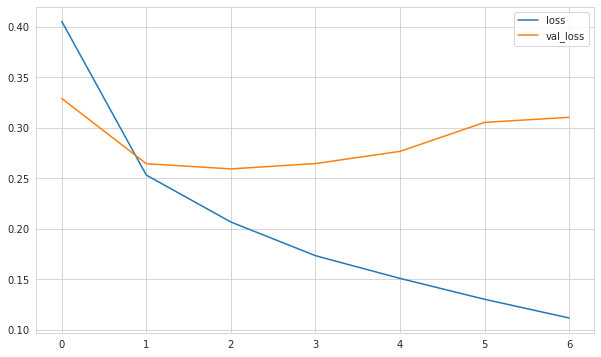

In [54]:
summary[["loss", "val_loss"]].plot();

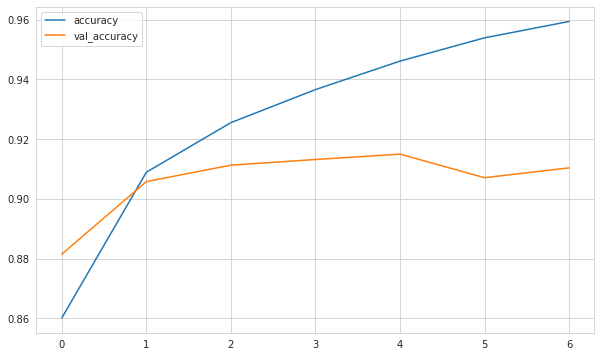

In [55]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
score = model.evaluate(X_test, y_test)
print("Test loss : ", score[0])
print("Test accuracy", score[1])


313/313 [==============================] - 1s 3ms/step - loss: 0.2765 - accuracy: 0.9150
Test loss :  0.27651447057724
Test accuracy 0.9150000214576721


In [58]:
pred_proba = model.predict(X_test)
pred_proba

array([[4.3115375e-07, 2.7364300e-09, 3.5506639e-06, ..., 1.8899365e-04,
        1.5381950e-06, 9.9914408e-01],
       [1.1945762e-07, 9.2228932e-19, 9.9999964e-01, ..., 7.3715312e-14,
        4.9432294e-14, 1.8551755e-14],
       [7.0363293e-10, 1.0000000e+00, 1.8302694e-12, ..., 1.4113913e-11,
        5.5471947e-09, 3.2450933e-13],
       ...,
       [5.9693861e-11, 1.8868299e-17, 9.9410769e-10, ..., 2.7657248e-09,
        1.0000000e+00, 5.4376578e-14],
       [7.6037010e-11, 9.9999988e-01, 9.2376931e-13, ..., 1.7147857e-10,
        2.6081299e-11, 4.3250025e-11],
       [2.3006108e-04, 1.2854513e-06, 6.0526549e-04, ..., 2.4515020e-02,
        5.5301902e-03, 6.3989160e-04]], dtype=float32)

In [65]:
pred_proba.shape

(10000, 10)

In [60]:
pred_proba[0]

array([4.3115375e-07, 2.7364300e-09, 3.5506639e-06, 3.8468864e-10,
       9.7270977e-08, 6.6015241e-04, 1.1510027e-06, 1.8899365e-04,
       1.5381950e-06, 9.9914408e-01], dtype=float32)

In [61]:
np.argmax(pred_proba[0])

9

In [62]:
y_pred = np.argmax(pred_proba, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [66]:
y_pred.shape

(10000,)

In [71]:
y_test_arg=np.argmax(y_test,axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, y_pred))

Confusion Matrix
[[911   0  11   8   3   1  62   0   4   0]
 [  4 976   0  14   1   2   1   0   2   0]
 [ 19   0 887   7  30   0  55   0   2   0]
 [ 18   2  14 922  20   0  21   0   3   0]
 [  3   1  75  26 821   1  70   0   3   0]
 [  0   0   0   0   0 988   0   9   0   3]
 [149   0  50  29  37   0 729   0   6   0]
 [  0   0   0   0   0  10   0 980   0  10]
 [  3   1   1   2   0   2   5   2 984   0]
 [  1   0   0   0   0   8   0  39   0 952]]


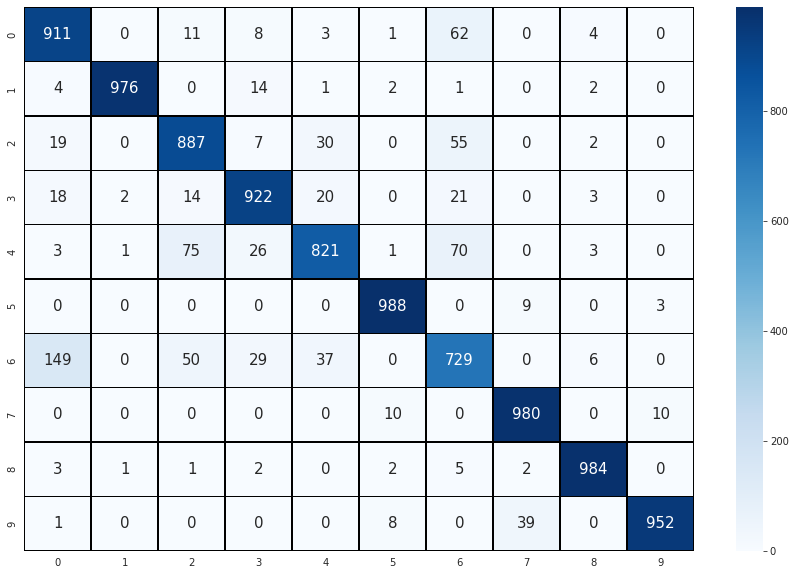

In [75]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test_arg, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [74]:
print(classification_report(y_test_arg, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.85      0.89      0.87      1000
           3       0.91      0.92      0.92      1000
           4       0.90      0.82      0.86      1000
           5       0.98      0.99      0.98      1000
           6       0.77      0.73      0.75      1000
           7       0.95      0.98      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.99      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.91     10000
weighted avg       0.92      0.92      0.91     10000



In [77]:
(y_test_arg != y_pred).sum()

850

## Prediction

In [78]:
my_clothes = X_test[3]

In [79]:
my_clothes.shape

(28, 28, 1)

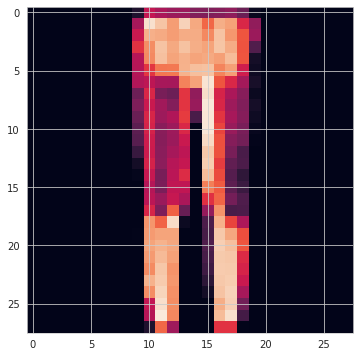

In [81]:
plt.imshow(my_clothes.reshape(28,28))

In [82]:
pred_proba = model.predict(my_clothes.reshape(1,28,28,1))
pred_proba

array([[1.7520559e-09, 9.9999964e-01, 1.5755537e-11, 3.4612458e-07,
        1.1219788e-09, 7.4361774e-11, 4.5195725e-10, 2.3690613e-10,
        1.9099307e-09, 1.9832028e-11]], dtype=float32)

In [83]:
y_pred = np.argmax(pred_proba)
y_pred

1

In [85]:
model.save("cnn_clothes_classification.h5")

In [86]:
model = tf.keras.models.load_model("cnn_clothes_classification.h5")

In [87]:
pred = model.predict(np.expand_dims(X_test[24], axis=0))

In [89]:
np.argmax(pred)

1

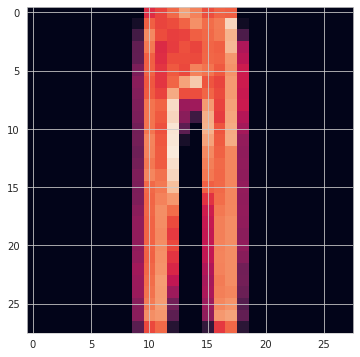

In [90]:
plt.imshow(X_test[24].reshape(28,28))

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___